In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(3)

In [7]:
df.shape

(150, 5)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(147, 5)

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

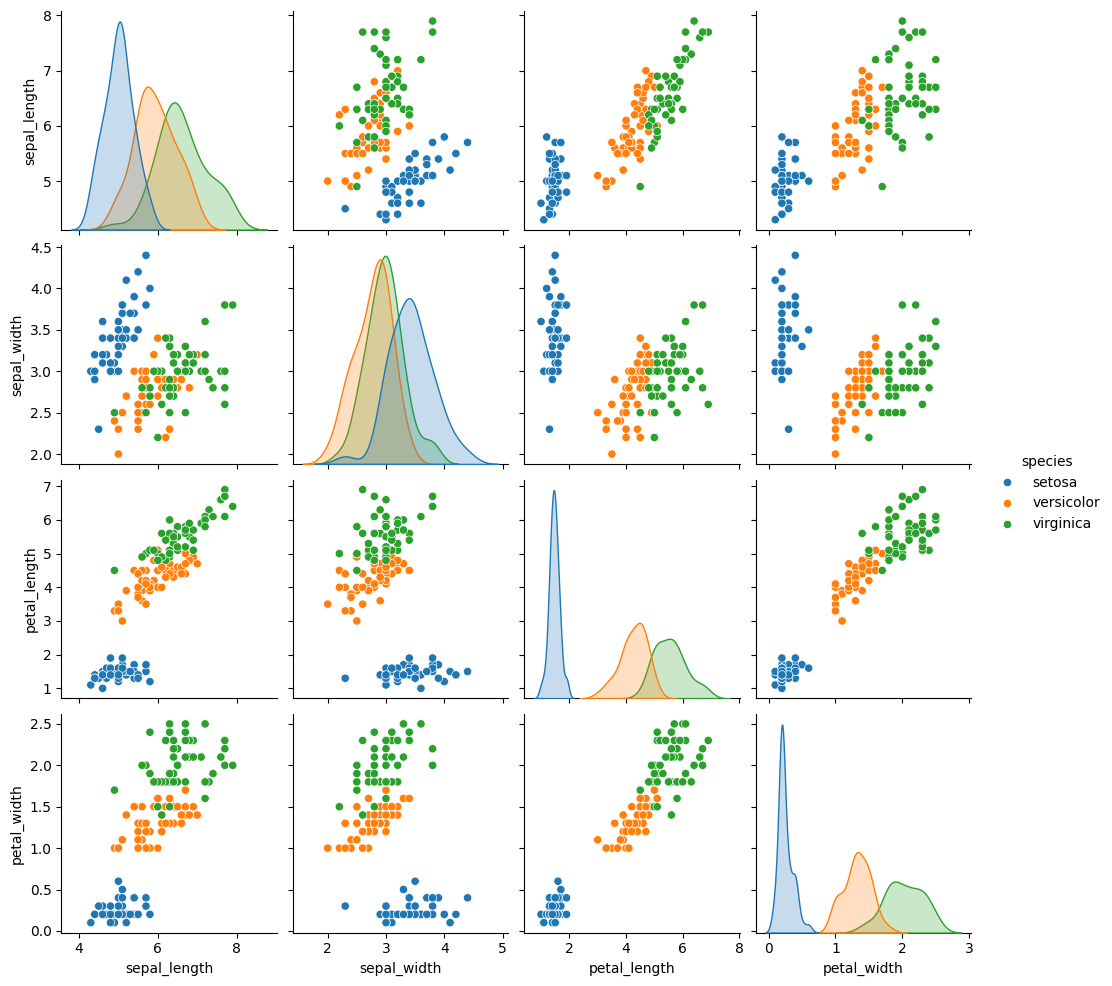

In [13]:
sns.pairplot(df, hue = "species")
plt.show()

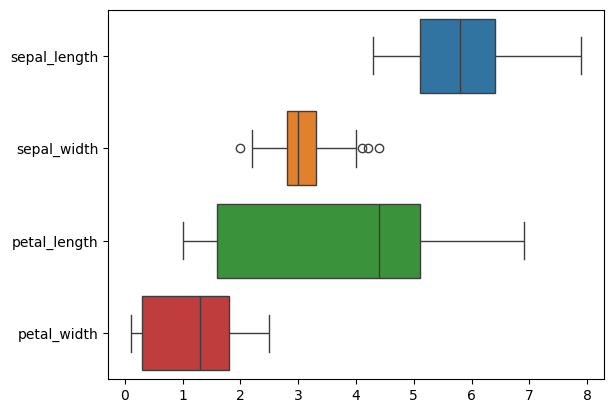

In [14]:
sns.boxplot(data = df, orient = "h")
plt.show()

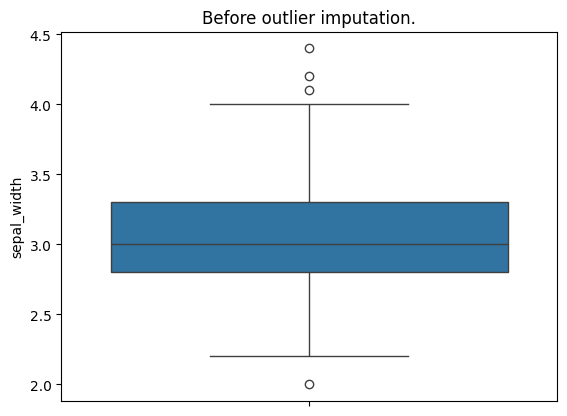

In [15]:
sns.boxplot(df["sepal_width"])
plt.title("Before outlier imputation.")
plt.show()

In [16]:
Q1 = df["sepal_width"].quantile(0.25)
Q3 = df["sepal_width"].quantile(0.75)

IQR = Q3 - Q1

Lower_value = Q1 - 1.5*IQR
Upper_value = Q3 + 1.5*IQR

sepal_median = np.median(df['sepal_width'])

In [17]:
print(f"Lower Value : {Lower_value}")
print(f"Upper Value : {Upper_value}")
print(f"Sepal Median : {sepal_median}")

Lower Value : 2.05
Upper Value : 4.05
Sepal Median : 3.0


In [18]:
for i in df['sepal_width']:
    if i > Upper_value or i < Lower_value:
        df['sepal_width'] = df['sepal_width'].replace(i, sepal_median)

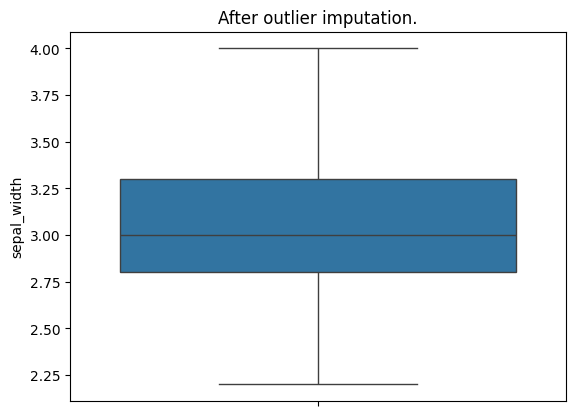

In [19]:
sns.boxplot(df["sepal_width"])
plt.title("After outlier imputation.")
plt.show()

# Model Training 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [26]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df["species"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 30, random_state = 42)

In [29]:
tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = tree_clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)

In [32]:
accuracy

0.9333333333333333

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [34]:
conf_matrix

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

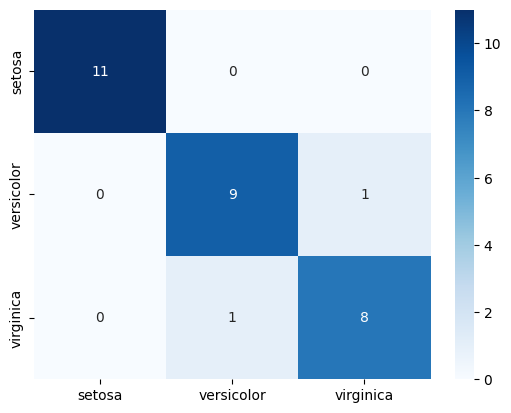

In [38]:
sns.heatmap(conf_matrix, annot = True, cmap = "Blues", xticklabels = tree_clf.classes_, yticklabels = tree_clf.classes_)
plt.show()

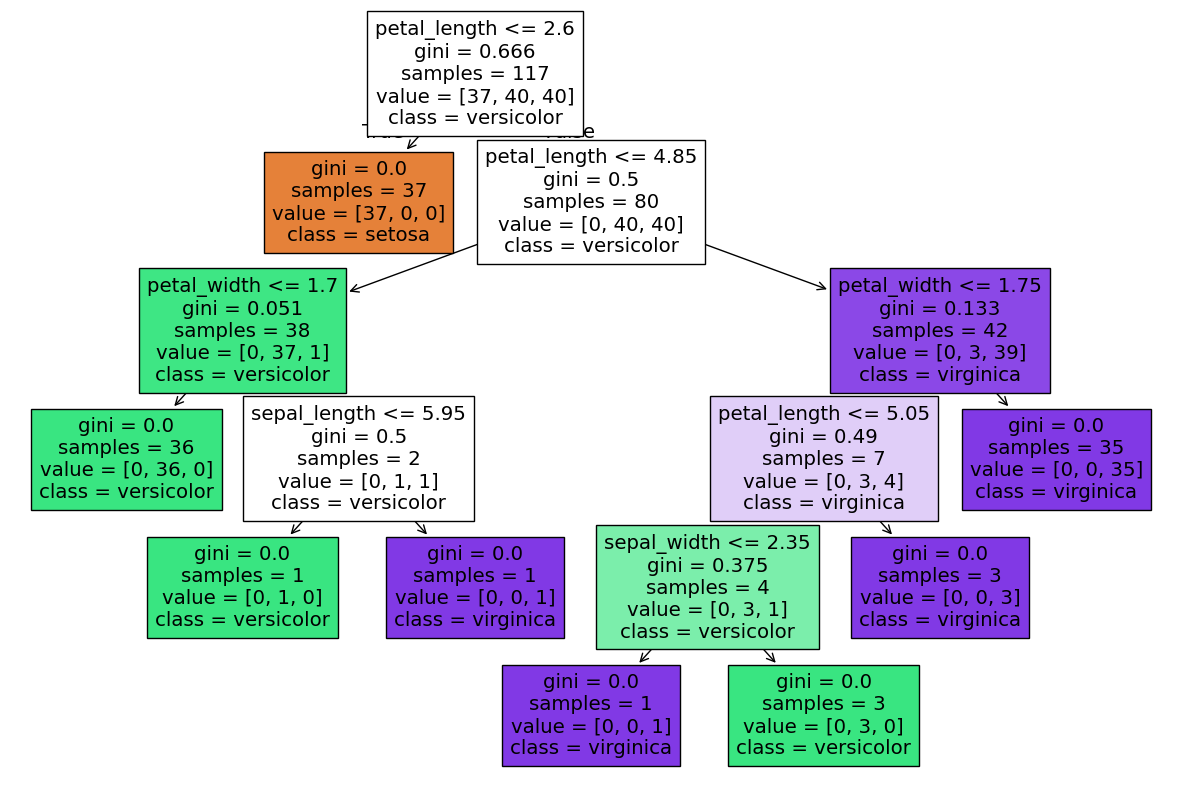

In [40]:
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, filled = True, feature_names = X.columns, class_names = tree_clf.classes_)
plt.show()

In [41]:
tree_clf.feature_importances_

array([0.01282895, 0.01924342, 0.92828329, 0.03964434])

In [42]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')